In [1]:
import requests
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
import numpy as np
import urllib3
from IPython.display import Image
from owslib.wms import WebMapService
from urllib.request import urlopen
from PIL import Image as I
from PIL import ImageDraw, ImageFont

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [2]:
import plotting
import processing

In [3]:
BASE_URL = 'https://ideas-digitaltwin.jpl.nasa.gov'
NEXUS_URL = f'{BASE_URL}/nexus'

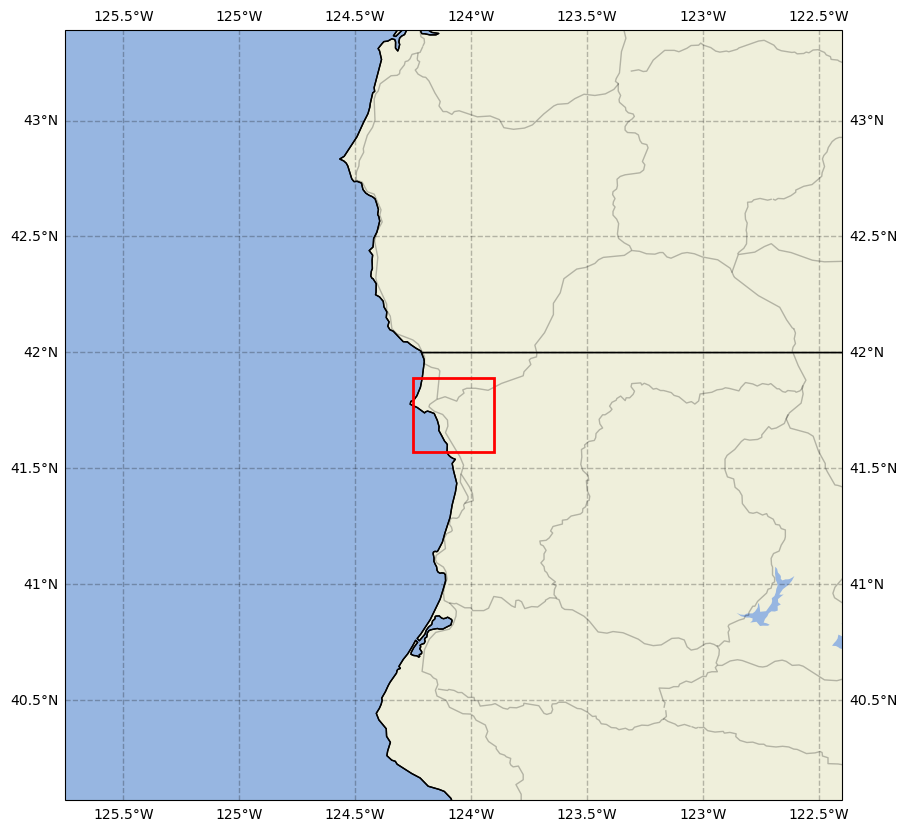

In [4]:
redwood_bb = dict(min_lon=-124.25, min_lat=41.57, max_lon=-123.90, max_lat=41.89)
redwood_start = datetime(2022, 9, 1)
redwood_sample = datetime(2022, 9, 20)
redwood_end = datetime(2022, 9, 30)

plotting.map_box(redwood_bb, padding=1.5)

In [5]:
PRECIP_DS = 'GPM_3IMERGDL_precipitationCal'
PRECIP_CLIM_DS = 'GPM_3IMERGDL_precipitationCal_clim'
SM_DS = 'SPL3SMP_PM_soil_moisture'
CO2_DS = ''

## Precipitation

In [6]:
precip_subset = processing.data_subsetting(PRECIP_DS, redwood_bb, redwood_sample, redwood_sample, )

https://ideas-digitaltwin.jpl.nasa.gov/nexus/datainbounds?ds=GPM_3IMERGDL_precipitationCal&b=-124.25%2C41.57%2C-123.9%2C41.89&startTime=2022-09-20T00%3A00%3A00Z&endTime=2022-09-20T00%3A00%3A00Z

Waiting for response...
took 0.17721408299985342 seconds


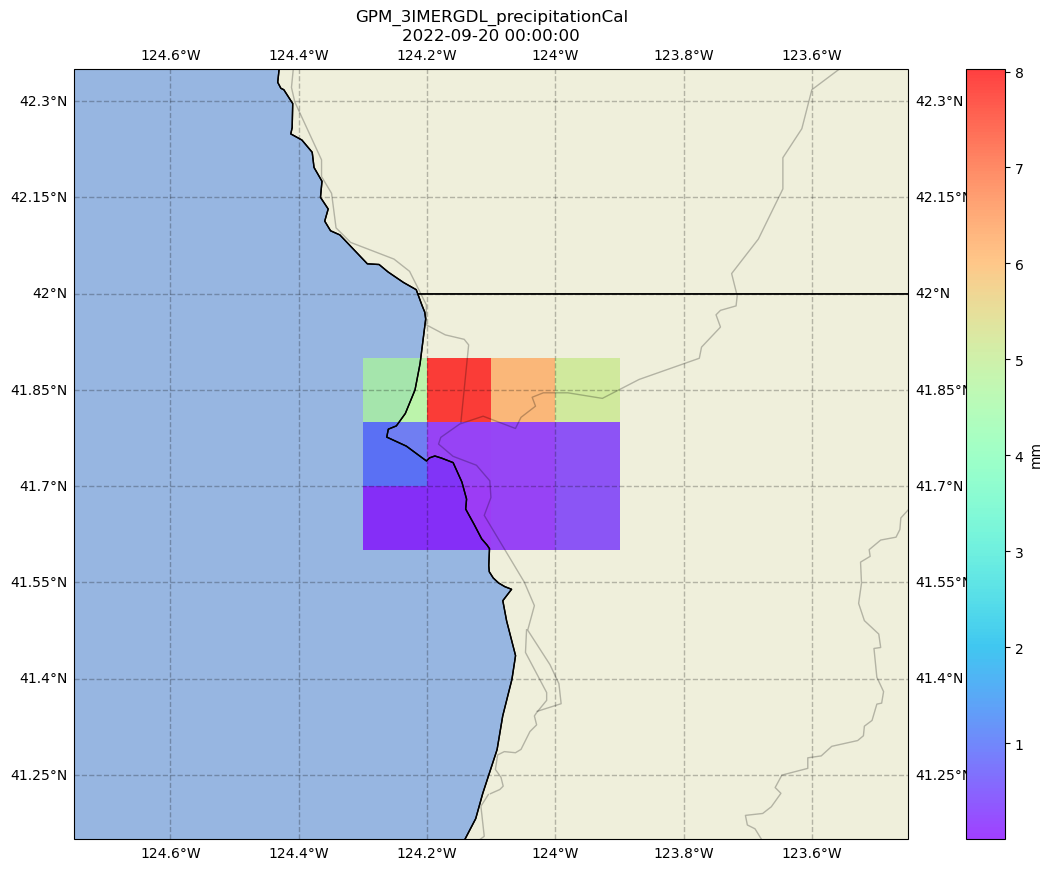

In [7]:
plotting.map_data(precip_subset[0], f'{PRECIP_DS}\n{redwood_sample}', padding=.5, cb_label='mm')

In [8]:
precip_ts = processing.spatial_timeseries(PRECIP_DS, redwood_bb, redwood_start, redwood_end)

https://ideas-digitaltwin.jpl.nasa.gov/nexus/timeSeriesSpark?ds=GPM_3IMERGDL_precipitationCal&minLon=-124.25&minLat=41.57&maxLon=-123.9&maxLat=41.89&startTime=2022-09-01T00%3A00%3A00Z&endTime=2022-09-30T00%3A00%3A00Z&lowPassFilter=False

Waiting for response...
took 8.488020459000836 seconds


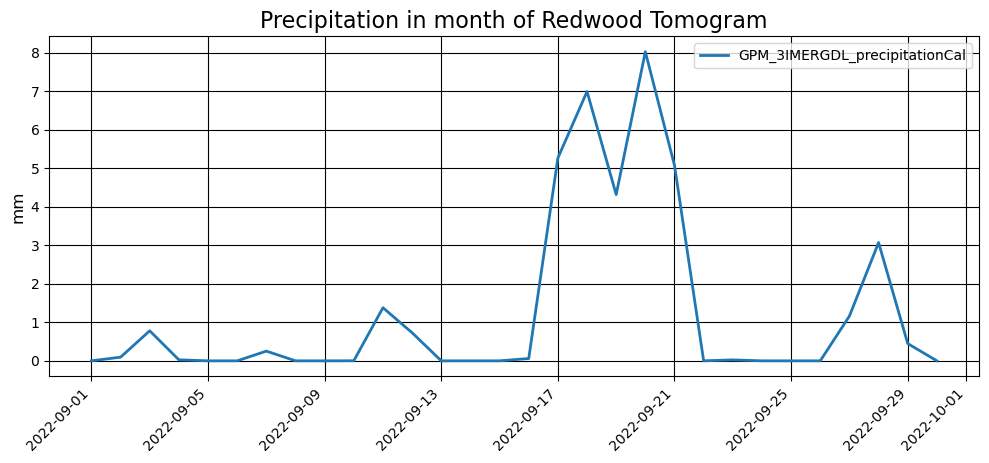

In [9]:
plotting.timeseries_plot(
    [(precip_ts['maximum'], PRECIP_DS)],
    '', 
    'mm', 
    'Precipitation in month of Redwood Tomogram', 
    norm=False
)

In [10]:
precip_daily_diff = processing.daily_diff(PRECIP_DS, PRECIP_CLIM_DS, redwood_bb, redwood_start, redwood_end)

https://ideas-digitaltwin.jpl.nasa.gov/nexus/dailydifferenceaverage_spark?dataset=GPM_3IMERGDL_precipitationCal&climatology=GPM_3IMERGDL_precipitationCal_clim&b=-124.25%2C41.57%2C-123.9%2C41.89&startTime=2022-09-01T00%3A00%3A00Z&endTime=2022-09-30T00%3A00%3A00Z

Waiting for response... 
took 0.9854843749999418 seconds


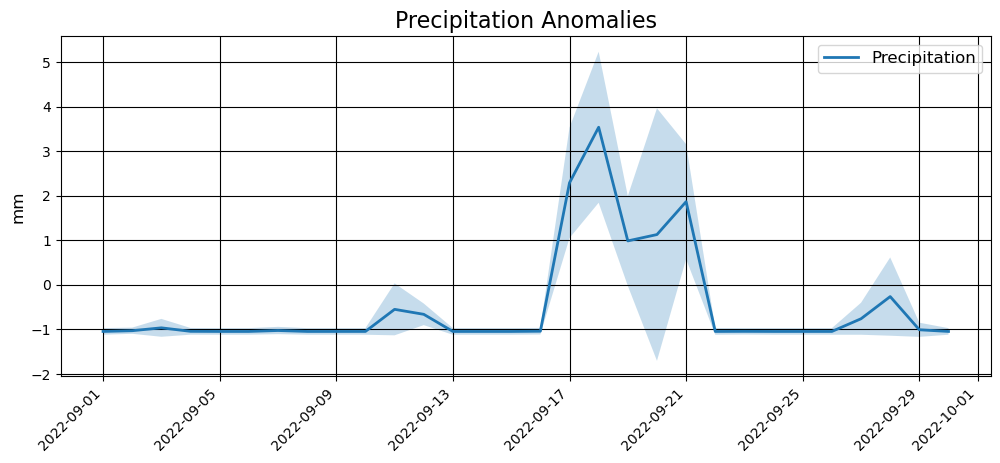

In [11]:
plotting.timeseries_bands_plot(precip_daily_diff, 'Precipitation', '', 'mm', 'Precipitation Anomalies')

## Soil Moisture

This section uses a large bounding box and the whole of 2022 due to data resolution and availability.

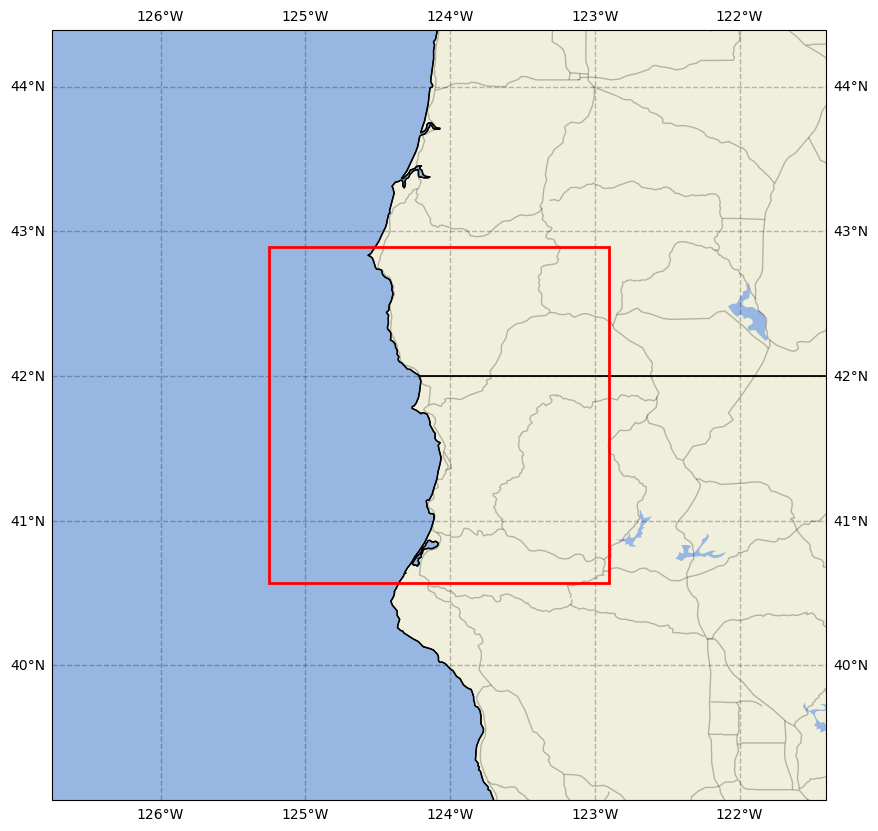

In [12]:
redwood_sm_bb = dict(min_lon=-125.25, min_lat=40.57, max_lon=-122.90, max_lat=42.89)

plotting.map_box(redwood_sm_bb, padding=1.5)

In [13]:
sm_subset = processing.data_subsetting(SM_DS, redwood_sm_bb, datetime(2022,1,1), datetime(2022,12,31), )

https://ideas-digitaltwin.jpl.nasa.gov/nexus/datainbounds?ds=SPL3SMP_PM_soil_moisture&b=-125.25%2C40.57%2C-122.9%2C42.89&startTime=2022-01-01T00%3A00%3A00Z&endTime=2022-12-31T00%3A00%3A00Z

Waiting for response...
took 4.372364957998798 seconds


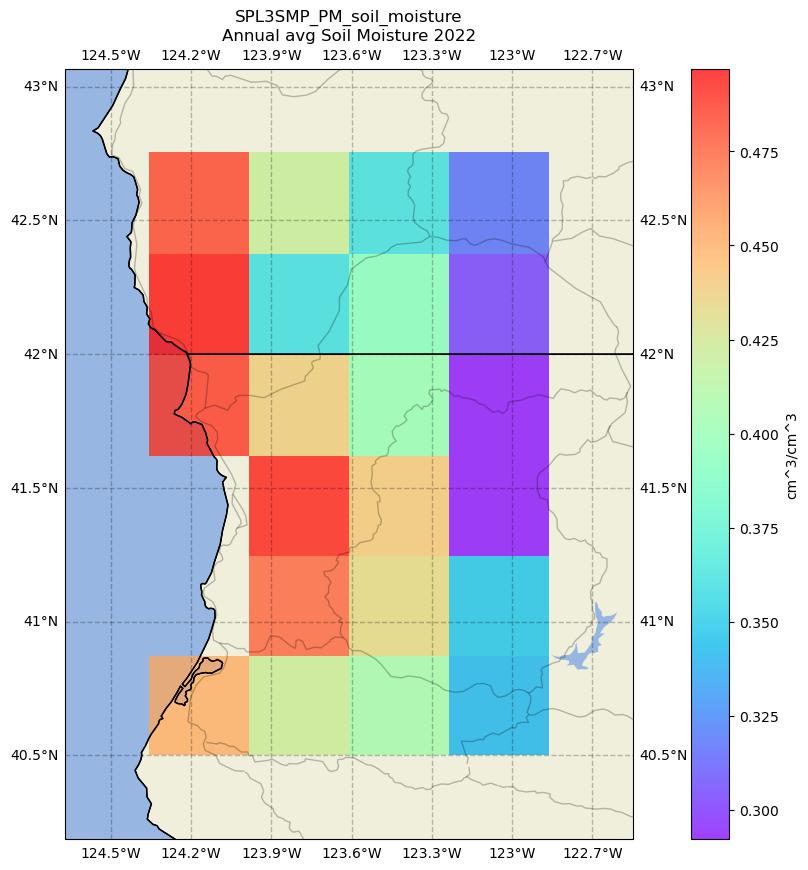

In [14]:
plotting.map_data(sm_subset.mean('time'), f'{SM_DS}\nAnnual avg Soil Moisture 2022', padding=.5, cb_label='cm^3/cm^3')

In [15]:
sm_ts = processing.spatial_timeseries(SM_DS, redwood_sm_bb, redwood_start, redwood_end)

https://ideas-digitaltwin.jpl.nasa.gov/nexus/timeSeriesSpark?ds=SPL3SMP_PM_soil_moisture&minLon=-125.25&minLat=40.57&maxLon=-122.9&maxLat=42.89&startTime=2022-09-01T00%3A00%3A00Z&endTime=2022-09-30T00%3A00%3A00Z&lowPassFilter=False

Waiting for response...
took 0.3315072910008894 seconds


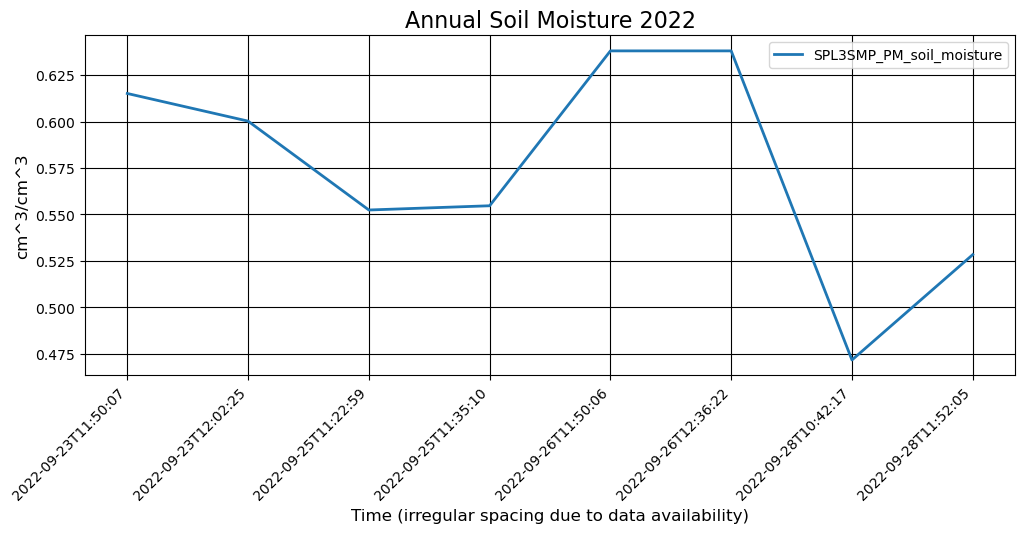

In [16]:
plotting.timeseries_plot_irregular(
    [(sm_ts['maximum'], SM_DS)],
    'Time (irregular spacing due to data availability)', 
    'cm^3/cm^3', 
    'Annual Soil Moisture 2022', 
    norm=False
)